 ## Contrastive PCA Analysis
 The goal of this notebook is to review the Contrastive PCA algorithm outputs on the simulated datasets.  The
 [**Silhoutte Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
 metric value will be computed for each of the datasets.  This value is a metric that trys to determine
 how well the different samples cluster together.  The best value is 1.0 and the worst value is -1.0.  It will
 be used to compare the datasets against each other.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn import metrics
from contrastive import CPCA
from src.models.encoders.levelmulti import LevelMulti

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 9)


In [2]:
def load_data(filename):
    df = pd.read_csv(filename, index_col=0)
    ylevel = df['level'].values.copy()      
    dfData = df.drop(['level', 'blexp'], axis=1).copy()
    return ylevel, dfData.values.copy()

def cpca_plot(dsver, dsname):
    ydata, Xdata = load_data('./data/processed/ds{0:04d}-{1}-train.csv'.format(dsver, dsname))
    ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(ydata.copy())

    _, Xback = load_data('./data/processed/ds{0:04d}-{1}-background-signal.csv'.format(dsver, dsname))
    CPCA().fit_transform(Xdata, Xback, plot=True, active_labels=ylabels)
    #CPCA().fit_transform(Xdata, Xback, plot=True, active_labels=ylabels, n_alphas=10, max_log_alpha=2, n_alphas_to_return=4)

    _, Xback = load_data('./data/processed/ds{0:04d}-{1}-background-nosignal.csv'.format(dsver, dsname))
    CPCA().fit_transform(Xdata, Xback, plot=True, active_labels=ylabels)  
    #CPCA().fit_transform(Xdata, Xback, plot=True, active_labels=ylabels, n_alphas=10, max_log_alpha=2, n_alphas_to_return=4)      

def cpca_score(dsver, dsname, bgname, alpha):
    _, Xback = load_data('./data/processed/ds{0:04d}-{1}-background-{2}.csv'.format(dsver, dsname, bgname))    
    ydata, Xdata = load_data('./data/processed/ds{0:04d}-{1}-train.csv'.format(dsver, dsname))
    ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(ydata.copy())   

    Xpca = CPCA().fit_transform(Xdata, Xback, alpha_selection='manual', alpha_value=alpha)  
    sscore = metrics.silhouette_score(Xpca, ylabels)  
    print('CPCA {0}-{1} Silhouette Score: {2:.4f} alpha={3:.2f}'.format(dsname.capitalize(), bgname.capitalize(), sscore, alpha))     


 ## Contrastive PCA Algorithm Parameters
 ### Alpha Parameter
 The Contrastive PCA algorithm is controlled by an alpha parameter.  The algorihm provides a built in way
 to search for and plot out the data using different alpha parameter values.  This notebook uses this method
 to display a set of plots for each dataset.

 ### Background Signal
 The Contrastive PCA algorithm is also required to have a background signal.  This analysis will compute
 the output values using two different background signals.  The first background signal will include the
 target signal (first row of plots).  The second background signal will not include a target signal (second
 row of plots).

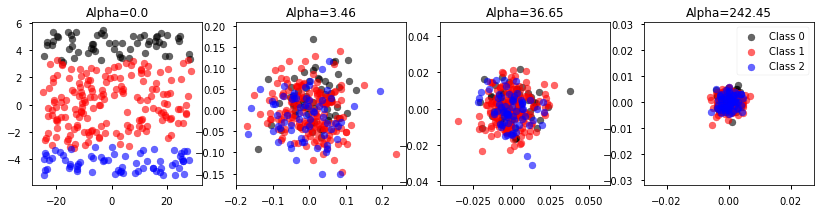

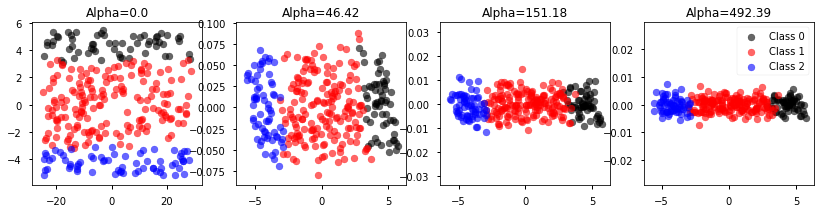

In [3]:
cpca_plot(2, 'filtered')


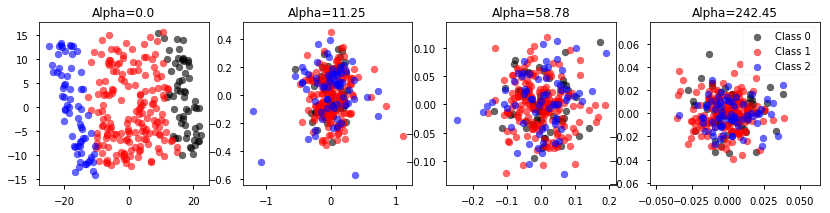

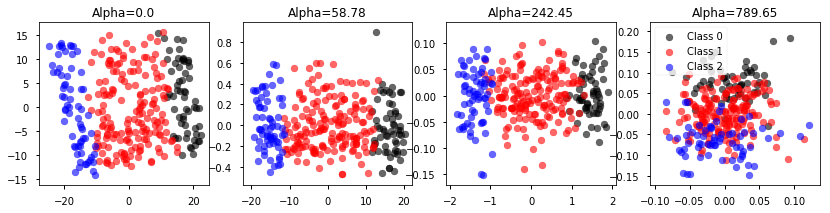

In [4]:
cpca_plot(2, 'baseline')


 ### Dataset Silhoutte Scores
 The plots above show that the Contrastive PCA outputs look better when using the background signal that
 does not contain the target signal.  The following cells will compute the Silhoutte Score metric values
 for only these datasets.

In [5]:
cpca_score(2, 'filtered', 'nosignal', 0.01)
cpca_score(2, 'filtered', 'nosignal', 46.42)
cpca_score(2, 'filtered', 'nosignal', 151.18)
cpca_score(2, 'filtered', 'nosignal', 492.39)


CPCA Filtered-Nosignal Silhouette Score: 0.0266 alpha=0.01
CPCA Filtered-Nosignal Silhouette Score: 0.4634 alpha=46.42
CPCA Filtered-Nosignal Silhouette Score: 0.4642 alpha=151.18
CPCA Filtered-Nosignal Silhouette Score: 0.4647 alpha=492.39


In [6]:
cpca_score(2, 'baseline', 'nosignal', 0.01)
cpca_score(2, 'baseline', 'nosignal', 58.78)
cpca_score(2, 'baseline', 'nosignal', 242.45)
cpca_score(2, 'baseline', 'nosignal', 789.65)


CPCA Baseline-Nosignal Silhouette Score: 0.2786 alpha=0.01
CPCA Baseline-Nosignal Silhouette Score: 0.4570 alpha=58.78
CPCA Baseline-Nosignal Silhouette Score: 0.4393 alpha=242.45
CPCA Baseline-Nosignal Silhouette Score: 0.0994 alpha=789.65


 ## Contrastive PCA Results
 Using the Contrastive PCA algorithm, the **Silhoutte Scores** are higher for the datasets that do not include
 the baseline correction step.  These results were obtained using a background signal that does not include
 the target signal. Also the **Silhoutte Scores** for the Contrastive PCA algorithm are significatly higher
 than the score values for the normal PCA algorithm with baseline correction.

 These initial results show that the Contrastive PCA with it's background signal can potentially provide better
 results and remove the need for baseline correction.